In [1]:
import numpy as np
import random
from copy import deepcopy
from collections import Counter, defaultdict
from datetime import datetime
from pickle import dump
from os.path import exists
from os import makedirs
import sys
import argparse
import warnings
import os
from tqdm import tqdm
# warnings.simplefilter("ignore", UserWarning)

from joblib import Parallel, delayed
import time

from sklearn.utils import check_random_state
# from sklearn.utils import resample
from sklearn.metrics import classification_report, balanced_accuracy_score, fbeta_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

# Sklearn Optimize
from skopt.space import Real, Integer, Categorical
from skopt import forest_minimize  # gp_minimize
from skopt.utils import use_named_args

# Imbalance Learn
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss, RandomUnderSampler  # EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, RandomOverSampler
# from imblearn.combine import SMOTEENN

# Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#import mixup modules
from mixup import mixupreg, converttohardlabel, mixupregjoachim, plot, softmax, StratifiedGroupKFold, mix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.utils.extmath import softmax
from sklearn.metrics import classification_report, balanced_accuracy_score, fbeta_score
#import matplotlib.pyplot.plot as plt
#williams
import numpy as np
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
#William's PCA plot
import itertools

import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
# FONTS FOR PYPLOT
pyplot.rcParams['font.sans-serif'] = "Georgia"
pyplot.rcParams['font.family'] = "sans-serif"


In [3]:
yfakemixup = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/y_mixup_train_stratified.npy')
xfakemixup = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/X_mixup_train_stratified.npy')
yfakemixupsoft = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/y_mixup_soft_train_stratified.npy')
y1hard = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/y_1hard.npy')
y2hard = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/y_2hard.npy')
lamd = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/lambdas.npy')
g1 = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/groups1.npy')
g2 = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/groups2.npy')
Yfakemax = yfakemixupsoft.argsort()[:, -2:][:, ::-1]
yminmixup = Yfakemax[:,1]
print(yfakemixupsoft.shape, Yfakemax.shape, yminmixup.shape)
print(np.count_nonzero(yminmixup.shape==yfakemixup))
xtrain = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/X_orig_train_stratified.npy')
ytrain = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/y_orig_train_stratified.npy')
xtest = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/X_orig_test_stratified.npy')
ytest = np.load('/Users/yeganehghamari/epilepsy-project/scratchExperiment/mixupdata_v2/y_orig_train_stratified.npy')
#g = np.load('/Users/yeganehghamari/epilepsy-project/data/multiclass_patients_new.npy', allow_pickle=True)

x = np.load('/Users/yeganehghamari/epilepsy-project/data/multiclass_X_new.npy')
y = np.load('/Users/yeganehghamari/epilepsy-project/data/multiclass_y_new.npy')

(50000, 6) (50000, 2) (50000,)
0


'Yfakemax = Yfake.argsort()[:, -2:][:, ::-1]\n\nprint(np.count_nonzero(Yfakemax == [0,1]), np.count_nonzero(Yfakemax == [0,2]), np.count_nonzero(Yfakemax == [0,3]), np.count_nonzero(Yfakemax == [0,4]), np.count_nonzero(Yfakemax == [0,5]))\nprint(np.count_nonzero(Yfakemax == [1,2]), np.count_nonzero(Yfakemax == [1,3]), np.count_nonzero(Yfakemax == [1,4]), np.count_nonzero(Yfakemax == [1,5]))\nprint(np.count_nonzero(Yfakemax == [2,3]), np.count_nonzero(Yfakemax == [2,4]), np.count_nonzero(Yfakemax == [2,5]))\n#print(np.count_nonzero(Yfakemax == [0,0]), np.count_nonzero(Yfakemax == [1,1]), np.count_nonzero(Yfakemax == [2,2]), np.count_nonzero(Yfakemax == [3,3]), np.count_nonzero(Yfakemax == [4,4]), np.count_nonzero(Yfakemax == [5,5]))\n#np.count_nonzero(Yfake[:,1]!= 0 and xfake[:, 2]!= 0)\nYmax = Yfakemax[:,0]\nYmin = Yfakemax[:,1]\nnp.count_nonzero(Ymax==Ymin)'

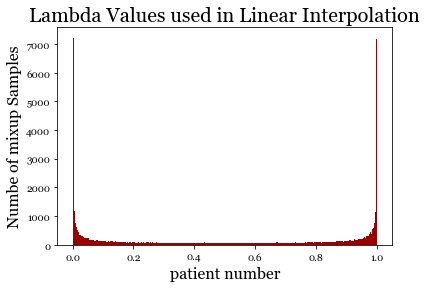

In [7]:
plt.hist(lamd, bins=301, color= '#990000')
plt.title('Lambda Values used in Linear Interpolation', size=20)
plt.xlabel('patient number', size=16)
plt.ylabel('Numbe of Mixup Samples', size=16)
plt.savefig('lamdhist.png')
plt.show()

In [3]:
n1 = int(np.count_nonzero(g1==g2))
n2 = int(np.count_nonzero(g1!=g2))
n1, n2

(193, 49807)

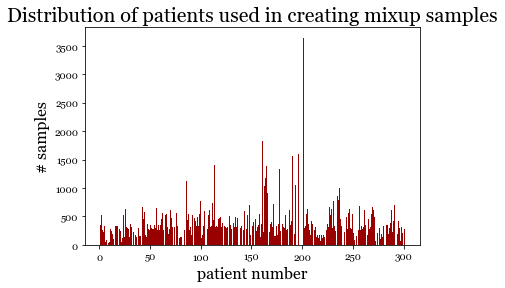

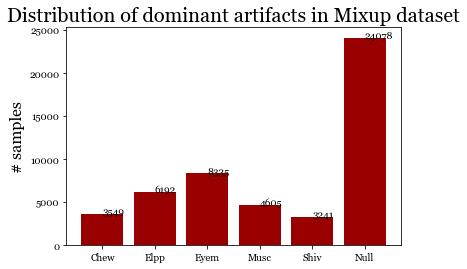

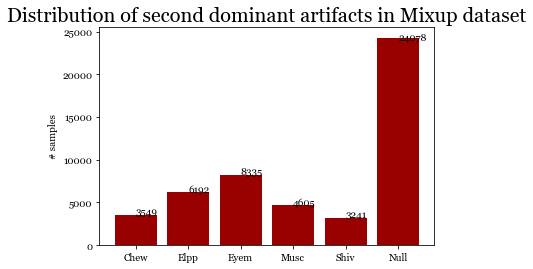

[3503, 6246, 8220, 4627, 3115, 24289]
[3549, 6192, 8335, 4605, 3241, 24078]


In [3]:
gs = np.append(g1, g2)
np.save('gs',gs)

plt.hist(gs, bins=301, color= '#990000')
plt.title('Distribution of patients used in creating mixup samples', size=20)
plt.xlabel('patient number', size=16)
plt.ylabel('# samples', size=16)
plt.savefig('patienthistmixup.png')
plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
artifact_names = ['Chew', 'Elpp', 'Eyem', 'Musc', 'Shiv', 'Null']
artifacts_count = [np.count_nonzero(yfakemixup==i) for i in range(6)]
np.save('artifactcountymax', artifacts_count)
plt.bar(artifact_names, artifacts_count, color= '#990000')
addlabels(artifact_names, artifacts_count)

'''for index, value in enumerate(artifacts_count):
    plt. text(value, index, str(value))'''

plt.title('Distribution of dominant artifacts in Mixup dataset', size=20)
plt.ylabel('# samples', size=16)

plt.savefig('artifactbarmixup.png')
plt.show()

artifacts_count1 = [np.count_nonzero(yminmixup==j) for j in range(6)]
np.save('artifact countymin', artifacts_count1)
plt.bar(artifact_names, artifacts_count1, color= '#990000')
addlabels(artifact_names, artifacts_count)

plt.title('Distribution of second dominant artifacts in Mixup dataset', size=20)
plt.ylabel('# samples')
plt.savefig('artifactbarmixup.png')
plt.show()
print(artifacts_count1)
print(artifacts_count)

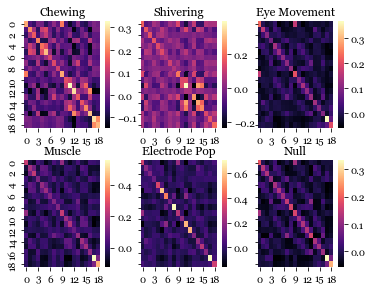

"for i in range(6):\n    sns.heatmap(np.cov(np.mean(x[y==i], axis=2).T))\n    plt.title('covariance matrix over channels')\n    plt.show()"

In [14]:
#covarience of the original data
artifact_names = ['Chewing', 'Electrode Pop', 'Eye Movement', 'Muscle', 'Shivering', 'Null']
channels = ['Fp1','F7', 'T3','T5','F3','C3','P3','O1','Cz','Fp2','F4','C4','P4','O2','F8','T4','T6','A1','A2']
'''f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
g1 = sns.heatmap(flights,cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(flights,cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g3 = sns.heatmap(flights,cmap="YlGnBu",ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('')
'''
fig, ax = pyplot.subplots(2, 3, sharey=True)
fig.tight_layout()

for i in range(6):
    g = sns.heatmap(np.cov(np.mean(x[y==i], axis=2).T), ax=ax[i % 2, i % 3], cmap='magma')
    ax[i % 2, i % 3].set_title(artifact_names[i])
    fig.subplots_adjust(right=0.85)
    
    
#plt.title('Covariance matrices over channels for raw data') 
plt.savefig('covartifactsv2.png')
pyplot.show()